In [1]:
import numpy as np
import simple_pid
import matplotlib.pyplot as plt
from furuta_gym.robot import Robot
import time

go


pendulum fell
2430


Text(0.5, 1.0, 'Motor Angles')

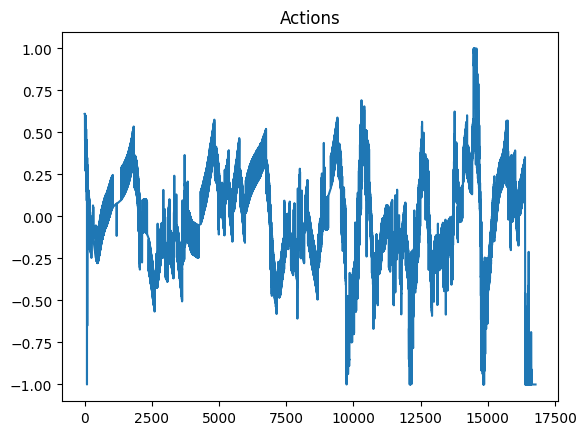

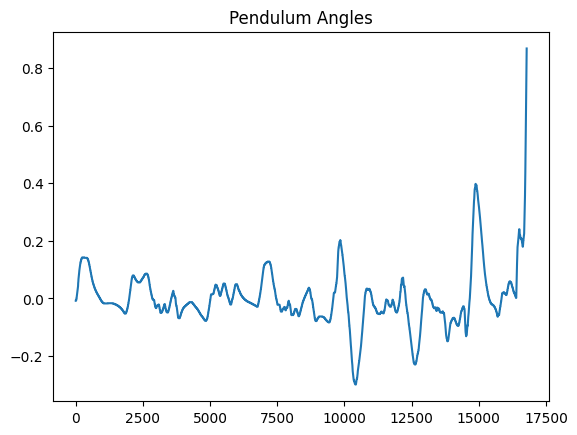

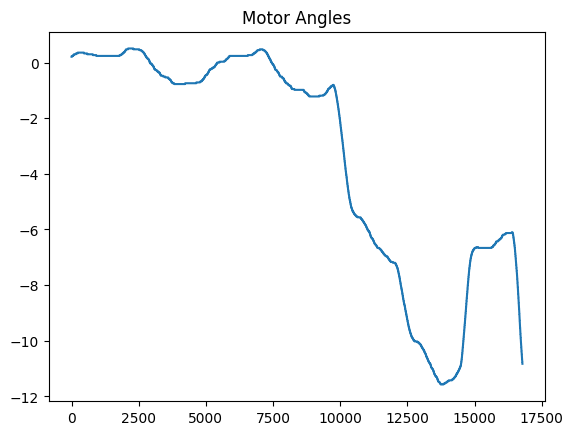

In [2]:
angle_thresh = 0.5 # rad

robot = Robot("/dev/ttyACM1")
Kp = 3.5
Ki = 20.0
Kd = 0.1

pendulum_PID = simple_pid.PID(Kp, Ki, Kd, setpoint=0, sample_time=0.0004) # 2.5 khz
motor_pid = simple_pid.PID(0.2, 0.001, 0.000, setpoint=0, sample_time=None)
actions = []
motor_angles = []
pendulum_angles = []

robot.reset_encoders()
print("go")

input()

motor_angle, pendulum_angle = robot.step(0)

nb_loops = 0
start = time.time()

last_act = 0
while True:
    act = pendulum_PID(np.sin(pendulum_angle)) 
    if act != last_act:
        last_act = act
        act -= motor_pid(motor_angle)
        act = np.clip(act, -1, 1)
        nb_loops += 1
        motor_angle, pendulum_angle = robot.step(act)

        actions.append(act)
        motor_angles.append(motor_angle)
        pendulum_angles.append(np.sin(pendulum_angle))
        
        if np.cos(pendulum_angle) > -0.5:
            print("pendulum fell")
            break

mean_loop_time = (time.time() - start) / nb_loops
print(int(1/mean_loop_time))

robot.close()


# plot actions, motor angles, pendulum angles
plt.figure(1)
plt.plot(actions)
plt.title("Actions")

plt.figure(2)
plt.plot(pendulum_angles)
plt.title("Pendulum Angles")

plt.figure(3)
plt.plot(motor_angles)
plt.title("Motor Angles")